In [2]:
import os, shutil

original_dataset_dir = "data/cats_vs_dogs/train"

dirs = []

base_dir = "data/cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))

print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small\train : 2
cats_vs_dogs_small\validation : 2
cats_vs_dogs_small\test : 2
cats_vs_dogs_small\train\cats : 1000
cats_vs_dogs_small\train\dogs : 1000
cats_vs_dogs_small\validation\cats : 500
cats_vs_dogs_small\validation\dogs : 500
cats_vs_dogs_small\test\cats : 500
cats_vs_dogs_small\test\dogs : 500
Done.


In [5]:
#Classification problem with 
#Find Data
#Preprocessing
    #Train,Val,Test,Split - already done with cats and dogs
    #resize
    #labeling 
    #balance and - having dogs and cats in equal qty, other it will show bias
    #shuffle dataset 
    #layers
        #activation
        #110
    #compile 
        #optimizing
        #loss
        #metrics
#ANN architecture
#FTraining 
    #HPO Hyper parameter optimization
    #fitting
    #vizualization
#Evaluate 
#deplot

#sigmoid 

#Use Conv2d - we need to extract details 
#decide pixel size
#use ReLu
#2nd layer maxpooling - generates visual hieraarchy
#conv2D => maxpool, move from 3D => to 1D (Flatten)
#after flatten => classification, depends on user how many layers


In [3]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), #extract 32 features in the first layer / 32 different edges
    activation="relu",
    input_shape=(150, 150, 3))) #colored images 150 x 150  3 = 3 color filters
model.add(layers.MaxPooling2D((2, 2))) #downsampling vector of 4 #edge detector
model.add(layers.Conv2D(64, (3, 3), activation="relu")) #moving window of 3 x 3 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5)) #added after figuring out that it is overfit. Did not use at first run. #training is longer because it has to relearn
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()



C:\Users\Christian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
# cats vs dogs example
#load a sample of data with labels
#create a training set which is balanced and mix
#transform to matrix using numpy
#resizing to 150 x 150
#make sure you have test, train and validation data. 

In [4]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), #lr = learning rate, initial steps , this will change over time we have rmpsprop #usually learning rate is HPO, but this time it's provided
    loss="binary_crossentropy", #recommend using default learning rate 0.001 review plot, if it needs to be faster learning rate, increase it to 0.04 maybe
    metrics=["accuracy"]
)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale = 1.0/255) #normalizing
test_datagen= ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(  #flow from local directory
    train_dir,
    target_size = (150,150), #decide a pixel size (random?) depends on computing power. Bigger, requires from Conv and layers
    batch_size = 20,
    class_mode ="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode ="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Data Gen is providing data above

In [6]:
history = model.fit_generator( 
    train_generator,
    steps_per_epoch = 100, #train generator has 2000 images to train with, with steps = 10, therefore batch size = 200
    epochs = 30, #steps x batch size = sample size
    validation_data= validation_generator, #provide a bridge to access drive
    validation_steps = 50  #
)

Epoch 1/30
100/100 [==============================] - 174s 2s/step - loss: 0.6911 - acc: 0.5245 - val_loss: 0.6772 - val_acc: 0.5670
Epoch 2/30
100/100 [==============================] - 173s 2s/step - loss: 0.6710 - acc: 0.5795 - val_loss: 0.6525 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 168s 2s/step - loss: 0.6408 - acc: 0.6255 - val_loss: 0.6342 - val_acc: 0.6220
Epoch 4/30
100/100 [==============================] - 195s 2s/step - loss: 0.6108 - acc: 0.6690 - val_loss: 0.6122 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 209s 2s/step - loss: 0.5759 - acc: 0.6960 - val_loss: 0.6222 - val_acc: 0.6490
Epoch 6/30
100/100 [==============================] - 219s 2s/step - loss: 0.5510 - acc: 0.7180 - val_loss: 0.5753 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 225s 2s/step - loss: 0.5302 - acc: 0.7250 - val_loss: 0.5788 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 234s 2s/step - 

98% accuracy, overfitting
If smaller overfitting, can use Dropout above before last layer
Weight regularization
Data Augmentation
Add more training data


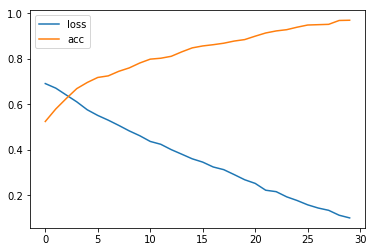

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["acc"], label="acc")

plt.legend()
plt.show()
plt.close()

Found 2000 images belonging to 2 classes.


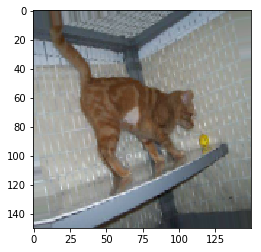

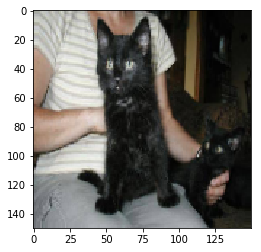

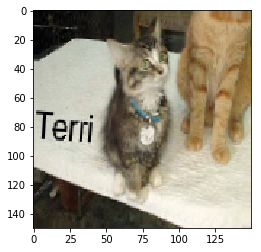

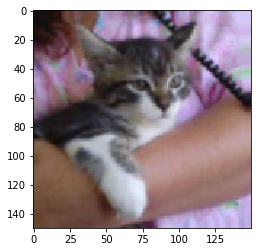

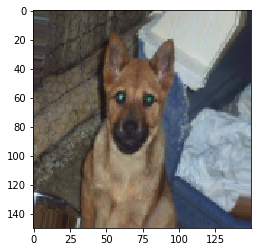

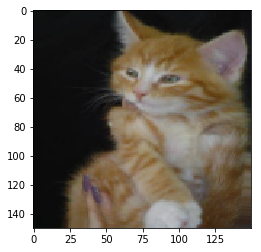

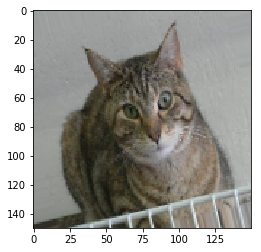

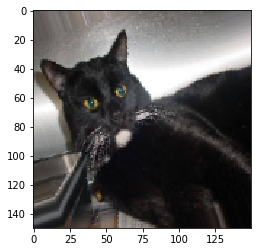

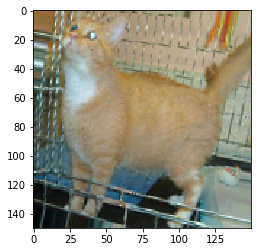

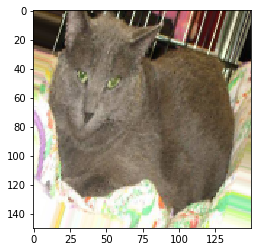

In [8]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary"
)

import matplotlib.pyplot as plt

images = next(generator)[0]
for image in images:
    plt.imshow(image)
    plt.show()
    plt.close()